<a href="https://colab.research.google.com/github/pavelshev03/skillbox/blob/master/Data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x=2
y=3
x+y

5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#path = 'https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true'
#path = 'https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true'
path = 'https://github.com/pavelsh03/skillbox/blob/master/%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3_5%D0%BB%D0%B5%D1%82.xls?raw=true'

data = pd.read_excel(path, skiprows=6)

In [ ]:
data  # типа данных - data frame

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,28.07.2020 06:00,16.6,762.4,762.8,-0.8,78.0,"Штиль, безветрие",0.0,NaN,NaN,70 – 80%.,,NaN,NaN,15.6,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,Осадков нет,12.0,NaN,NaN,NaN,NaN
1,28.07.2020 03:00,16.3,763.2,763.7,-0.5,79.0,"Штиль, безветрие",0.0,NaN,NaN,40%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",40%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN
2,28.07.2020 00:00,17.9,763.7,764.2,-0.2,72.0,"Ветер, дующий с востока",1.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",60%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN
3,27.07.2020 21:00,20.7,763.9,764.4,-0.2,54.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,25.4,"Слоисто-кучевых, слоистых, кучевых или кучево-...",20–30%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,10.9,Осадков нет,12.0,NaN,NaN,NaN,NaN
4,27.07.2020 18:00,23.5,764.1,764.5,-0.6,49.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.2,Осадков нет,12.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,28.07.2018 12:00,26.9,767.8,768.3,0.0,64.0,"Ветер, дующий с северо-востока",2.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,NaN,"Кучевые плоские или кучевые разорванные, или т...",20–30%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,19.6,NaN,NaN,NaN,NaN,NaN,NaN
5844,28.07.2018 09:00,24.1,767.8,768.3,-0.1,75.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,20–30%.,,NaN,NaN,20.8,NaN,"Кучевые плоские или кучевые разорванные, или т...",20–30%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,19.3,Осадков нет,12.0,Поверхность почвы сухая (без трещин и без заме...,21.0,NaN,NaN
5845,28.07.2018 06:00,20.8,767.9,768.4,0.3,86.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,20.8,NaN,NaN,NaN,NaN,NaN,NaN,10.0,18.4,Осадков нет,12.0,NaN,NaN,NaN,NaN
5846,28.07.2018 03:00,22.3,767.6,768.1,0.3,81.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,18.8,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns


Index(['Местное время в Санкт-Петербурге', 'T', 'Po', 'P', 'Pa', 'U', 'DD',
       'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H',
       'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

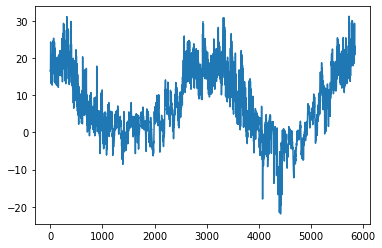

In [ ]:
x = data.index
y = data['T']

plt.plot(x, y)

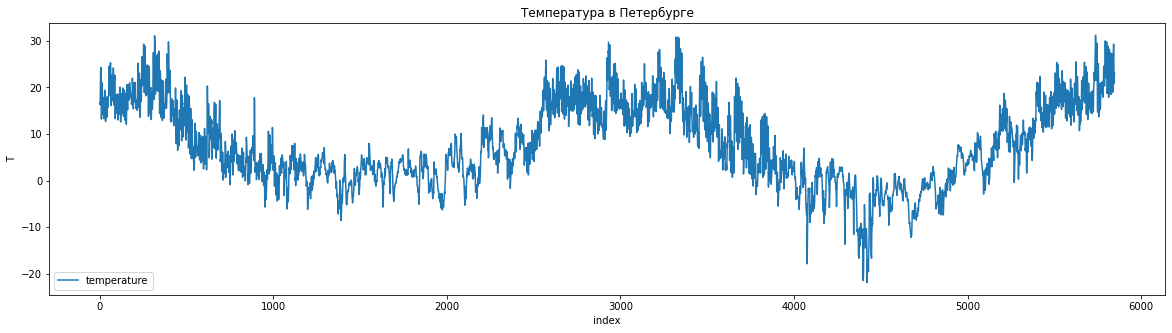

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(x, y, label='temperature')
plt.title('Температура в Петербурге')
plt.xlabel('index')
plt.ylabel('T')
plt.legend()

In [ ]:
data['Местное время в Санкт-Петербурге']

0       28.07.2020 06:00
1       28.07.2020 03:00
2       28.07.2020 00:00
3       27.07.2020 21:00
4       27.07.2020 18:00
              ...       
5843    28.07.2018 12:00
5844    28.07.2018 09:00
5845    28.07.2018 06:00
5846    28.07.2018 03:00
5847    28.07.2018 00:00
Name: Местное время в Санкт-Петербурге, Length: 5848, dtype: object

In [ ]:
data['Местное время в Санкт-Петербурге'][0]
data['date'] = pd.to_datetime(data['Местное время в Санкт-Петербурге'])

In [ ]:
data['date'][0]  # С этим типом данных уже можно работать


Timestamp('2020-07-28 06:00:00')

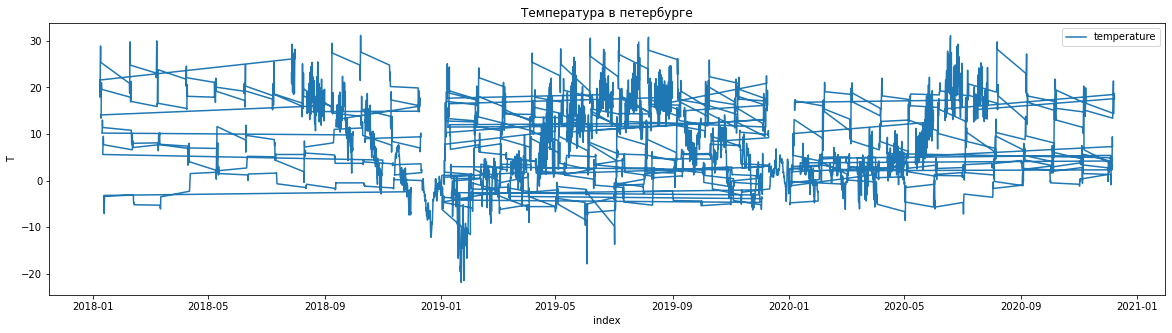

In [ ]:
x = data['date']
y = data['T']

plt.figure(figsize=(20, 5))
plt.plot(x, y, label='temperature')
plt.title('Температура в Санкт-Петербурге')
plt.xlabel('index')
plt.ylabel('T')
plt.legend()

In [ ]:
# 2 беды:
# данные задом наперед - сначала 2015, потом 2020
# по умолчанию pandas пытается считать американский формат

# Фиксим российский формат дат на американский
data['date2'] = pd.to_datetime(data['Местное время в Санкт-Петербурге'], dayfirst=True)

In [ ]:
# Отсортировали данные по дате в правильном порядке
data = data.sort_values('date2')
data

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
5847,28.07.2018 00:00,23.1,767.3,767.8,-0.1,79.0,"Ветер, дующий с востока",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,19.2,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28 00:00:00,2018-07-28 00:00:00
5846,28.07.2018 03:00,22.3,767.6,768.1,0.3,81.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,18.8,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28 03:00:00,2018-07-28 03:00:00
5845,28.07.2018 06:00,20.8,767.9,768.4,0.3,86.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,20.8,NaN,NaN,NaN,NaN,NaN,NaN,10.0,18.4,Осадков нет,12.0,NaN,NaN,NaN,NaN,2018-07-28 06:00:00,2018-07-28 06:00:00
5844,28.07.2018 09:00,24.1,767.8,768.3,-0.1,75.0,"Ветер, дующий с северо-востока",1.0,NaN,NaN,20–30%.,,NaN,NaN,20.8,NaN,"Кучевые плоские или кучевые разорванные, или т...",20–30%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,19.3,Осадков нет,12.0,Поверхность почвы сухая (без трещин и без заме...,21.0,NaN,NaN,2018-07-28 09:00:00,2018-07-28 09:00:00
5843,28.07.2018 12:00,26.9,767.8,768.3,0.0,64.0,"Ветер, дующий с северо-востока",2.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,NaN,"Кучевые плоские или кучевые разорванные, или т...",20–30%.,600-1000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,19.6,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28 12:00:00,2018-07-28 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,27.07.2020 18:00,23.5,764.1,764.5,-0.6,49.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.2,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-07-27 18:00:00,2020-07-27 18:00:00
3,27.07.2020 21:00,20.7,763.9,764.4,-0.2,54.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,25.4,"Слоисто-кучевых, слоистых, кучевых или кучево-...",20–30%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,10.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-07-27 21:00:00,2020-07-27 21:00:00
2,28.07.2020 00:00,17.9,763.7,764.2,-0.2,72.0,"Ветер, дующий с востока",1.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",60%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-28 00:00:00,2020-07-28 00:00:00
1,28.07.2020 03:00,16.3,763.2,763.7,-0.5,79.0,"Штиль, безветрие",0.0,NaN,NaN,40%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",40%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-28 03:00:00,2020-07-28 03:00:00


In [ ]:
data = data.reset_index(drop=True)


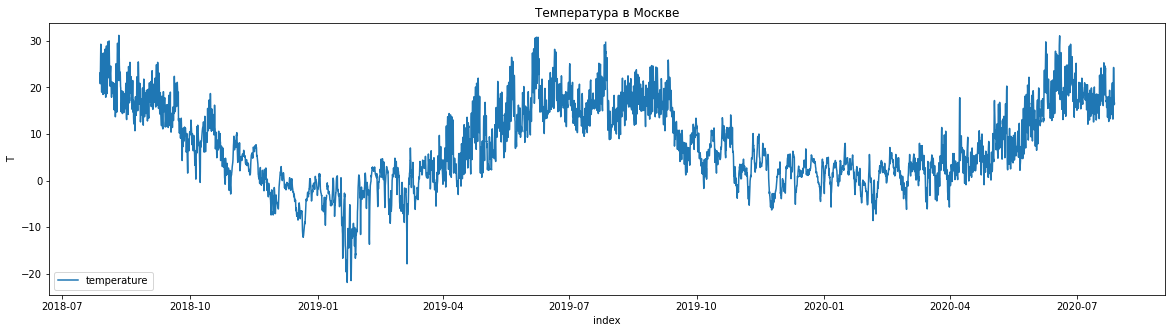

In [ ]:
x = data['date2']
y = data['T']

plt.figure(figsize=(20, 5))
plt.plot(x, y, label='temperature')
plt.title('Температура в Москве')
plt.xlabel('index')
plt.ylabel('T')
plt.legend()

In [ ]:
# Фильтрация по условию
day_first = pd.Timestamp(day=1, month=2, year=2019)
condition = (data['date2'] > day_first)
data[condition]

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
1505,01.02.2019 03:00,-4.5,763.3,763.9,0.4,94.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 03:00:00,2019-02-01 03:00:00
1506,01.02.2019 06:00,-2.5,763.3,763.9,0.0,92.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,100%.,,NaN,NaN,-12.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,10.0,-3.6,Осадков нет,12.0,NaN,NaN,NaN,NaN,2019-01-02 06:00:00,2019-02-01 06:00:00
1507,01.02.2019 09:00,-2.1,763.5,764.1,0.2,87.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,-12.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-4.0,Осадков нет,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,43,2019-01-02 09:00:00,2019-02-01 09:00:00
1508,01.02.2019 12:00,-1.4,763.7,764.3,0.2,77.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 12:00:00,2019-02-01 12:00:00
1509,01.02.2019 15:00,-1.8,763.6,764.2,-0.1,73.0,"Ветер, дующий с востока",2.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,10.0,-6.1,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 15:00:00,2019-02-01 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,27.07.2020 18:00,23.5,764.1,764.5,-0.6,49.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.2,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-07-27 18:00:00,2020-07-27 18:00:00
5844,27.07.2020 21:00,20.7,763.9,764.4,-0.2,54.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,25.4,"Слоисто-кучевых, слоистых, кучевых или кучево-...",20–30%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,10.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-07-27 21:00:00,2020-07-27 21:00:00
5845,28.07.2020 00:00,17.9,763.7,764.2,-0.2,72.0,"Ветер, дующий с востока",1.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",60%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-28 00:00:00,2020-07-28 00:00:00
5846,28.07.2020 03:00,16.3,763.2,763.7,-0.5,79.0,"Штиль, безветрие",0.0,NaN,NaN,40%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",40%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-28 03:00:00,2020-07-28 03:00:00


In [ ]:
# Фильтрация по условию
day_first = pd.Timestamp(day=1, month=2, year=2019)
day_first


Timestamp('2019-02-01 00:00:00')

In [ ]:
# Для самопроверки упражнение:
# вывести на график данные с 1 декабря 2016 по 1 января 2018 года



In [ ]:
#   1 СПОСОБ

In [ ]:
condition_left = (data['date2'] >= day_first)
date3 = data[condition_left]
date3

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
1504,01.02.2019 00:00,-6.2,762.9,763.5,0.8,92.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,10.0,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 00:00:00,2019-02-01 00:00:00
1505,01.02.2019 03:00,-4.5,763.3,763.9,0.4,94.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 03:00:00,2019-02-01 03:00:00
1506,01.02.2019 06:00,-2.5,763.3,763.9,0.0,92.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,100%.,,NaN,NaN,-12.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,10.0,-3.6,Осадков нет,12.0,NaN,NaN,NaN,NaN,2019-01-02 06:00:00,2019-02-01 06:00:00
1507,01.02.2019 09:00,-2.1,763.5,764.1,0.2,87.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,-12.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-4.0,Осадков нет,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,43,2019-01-02 09:00:00,2019-02-01 09:00:00
1508,01.02.2019 12:00,-1.4,763.7,764.3,0.2,77.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 12:00:00,2019-02-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,27.07.2020 18:00,23.5,764.1,764.5,-0.6,49.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.2,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-07-27 18:00:00,2020-07-27 18:00:00
5844,27.07.2020 21:00,20.7,763.9,764.4,-0.2,54.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,20–30%.,,NaN,NaN,NaN,25.4,"Слоисто-кучевых, слоистых, кучевых или кучево-...",20–30%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,10.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-07-27 21:00:00,2020-07-27 21:00:00
5845,28.07.2020 00:00,17.9,763.7,764.2,-0.2,72.0,"Ветер, дующий с востока",1.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",60%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-28 00:00:00,2020-07-28 00:00:00
5846,28.07.2020 03:00,16.3,763.2,763.7,-0.5,79.0,"Штиль, безветрие",0.0,NaN,NaN,40%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",40%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,12.7,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-28 03:00:00,2020-07-28 03:00:00


In [ ]:
#   2-Й СПОСОБ  - ПРЕДПОЧТИТЕЛЬНЫЙ !

In [ ]:
day_first = pd.Timestamp(day=1, month=2, year=2019)
day_last = pd.Timestamp(day=1, month=3, year=2020)
condition = (data['date2'] >= day_first) & (data['date2'] < day_last)
date4 = data[condition]
date4

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
1504,01.02.2019 00:00,-6.2,762.9,763.5,0.8,92.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,10.0,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 00:00:00,2019-02-01 00:00:00
1505,01.02.2019 03:00,-4.5,763.3,763.9,0.4,94.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 03:00:00,2019-02-01 03:00:00
1506,01.02.2019 06:00,-2.5,763.3,763.9,0.0,92.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,100%.,,NaN,NaN,-12.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,10.0,-3.6,Осадков нет,12.0,NaN,NaN,NaN,NaN,2019-01-02 06:00:00,2019-02-01 06:00:00
1507,01.02.2019 09:00,-2.1,763.5,764.1,0.2,87.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,-12.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-4.0,Осадков нет,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,43,2019-01-02 09:00:00,2019-02-01 09:00:00
1508,01.02.2019 12:00,-1.4,763.7,764.3,0.2,77.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 12:00:00,2019-02-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,29.02.2020 09:00,-6.2,749.7,750.1,0.4,81.0,"Ветер, дующий с запада",1.0,NaN,NaN,Облаков нет.,Состояние неба в общем не изменилось.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,-6.9,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-8.9,0.6,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,3,2020-02-29 09:00:00,2020-02-29 09:00:00
4651,29.02.2020 12:00,-2.9,750.0,750.5,0.3,63.0,"Ветер, дующий с запада",3.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29 12:00:00,2020-02-29 12:00:00
4652,29.02.2020 15:00,-0.3,750.5,751.0,0.5,59.0,"Ветер, дующий с запада",4.0,NaN,NaN,"10% или менее, но не 0",,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.",Высококучевые башенкообразные или хлопьевидные.,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29 15:00:00,2020-02-29 15:00:00
4653,29.02.2020 18:00,-0.5,750.5,751.0,0.0,67.0,"Ветер, дующий с запада",2.0,NaN,NaN,"10% или менее, но не 0",,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.",Высококучевые башенкообразные или хлопьевидные.,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,-5.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-02-29 18:00:00,2020-02-29 18:00:00


In [ ]:
#   3-Й СПОСОБ

In [ ]:
day_first = pd.Timestamp(day=1, month=2, year=2019)
day_last = pd.Timestamp(day=1, month=3, year=2020)
date5 = data[data['date2'].between(day_first,day_last)]
date5

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
1504,01.02.2019 00:00,-6.2,762.9,763.5,0.8,92.0,"Ветер, дующий с северо-северо-востока",1.0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,100-200,NaN,NaN,10.0,-7.3,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 00:00:00,2019-02-01 00:00:00
1505,01.02.2019 03:00,-4.5,763.3,763.9,0.4,94.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,Дымка.,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-5.4,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 03:00:00,2019-02-01 03:00:00
1506,01.02.2019 06:00,-2.5,763.3,763.9,0.0,92.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,100%.,,NaN,NaN,-12.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,10.0,-3.6,Осадков нет,12.0,NaN,NaN,NaN,NaN,2019-01-02 06:00:00,2019-02-01 06:00:00
1507,01.02.2019 09:00,-2.1,763.5,764.1,0.2,87.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,-12.1,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-4.0,Осадков нет,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,43,2019-01-02 09:00:00,2019-02-01 09:00:00
1508,01.02.2019 12:00,-1.4,763.7,764.3,0.2,77.0,"Ветер, дующий с востоко-северо-востока",1.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 12:00:00,2019-02-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4651,29.02.2020 12:00,-2.9,750.0,750.5,0.3,63.0,"Ветер, дующий с запада",3.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29 12:00:00,2020-02-29 12:00:00
4652,29.02.2020 15:00,-0.3,750.5,751.0,0.5,59.0,"Ветер, дующий с запада",4.0,NaN,NaN,"10% или менее, но не 0",,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.",Высококучевые башенкообразные или хлопьевидные.,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29 15:00:00,2020-02-29 15:00:00
4653,29.02.2020 18:00,-0.5,750.5,751.0,0.0,67.0,"Ветер, дующий с запада",2.0,NaN,NaN,"10% или менее, но не 0",,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","10% или менее, но не 0","2500 или более, или облаков нет.",Высококучевые башенкообразные или хлопьевидные.,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,-5.9,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-02-29 18:00:00,2020-02-29 18:00:00
4654,29.02.2020 21:00,-0.8,750.7,751.3,0.2,71.0,"Ветер, дующий с юго-юго-запада",2.0,NaN,NaN,100%.,,NaN,NaN,NaN,0.3,"Слоисто-кучевые, образовавшиеся не из кучевых.",60%.,600-1000,Высокослоистые просвечивающие.,NaN,10.0,-5.4,Осадков нет,12.0,NaN,NaN,NaN,NaN,2020-02-29 21:00:00,2020-02-29 21:00:00
